<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-422-srilatha/Filter_methods_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Feature selection
k = 3
selector = SelectKBest(score_func=f_classif, k=k)
X_anova = selector.fit_transform(X, y)
scores = selector.scores_

# Create and sort DataFrame of F-scores
anova_df = pd.DataFrame({'feature': X.columns, 'F_score': scores})
anova_df = anova_df.sort_values(by='F_score', ascending=False)

# Print results
print(anova_df)
print(f"Top {k} features:", list(anova_df['feature'][:k]))

             feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040
Top 3 features: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']


In [ ]:
display(anova_df.style.background_gradient('Reds', subset=['F_score']))


,feature,F_score
2,petal length (cm),1180.161182
3,petal width (cm),960.007147
0,sepal length (cm),119.264502
1,sepal width (cm),49.160040


In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Define the function
def run_anova(k):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    scores = selector.scores_
    anova_df = pd.DataFrame({'feature': X.columns, 'F_score': scores})
    anova_df = anova_df.sort_values(by='F_score', ascending=False)
    return anova_df

# Stability check
stability = {}
for k in [1, 2, 3, 4]:
    stability[k] = list(run_anova(k)['feature'][:k])

print("Top-k stability:", stability)

Top-k stability: {1: ['petal length (cm)'], 2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


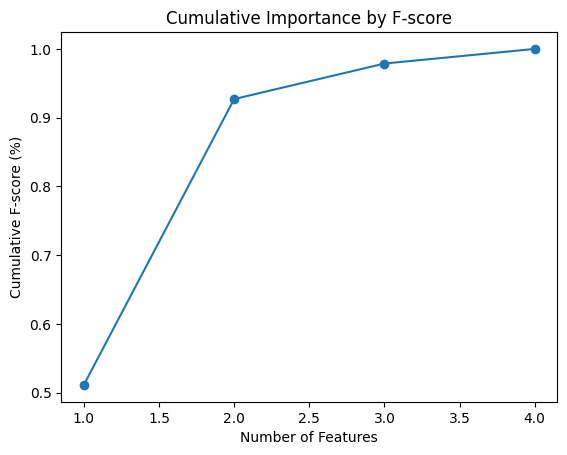

In [ ]:
cum = anova_df['F_score'].cumsum() / anova_df['F_score'].sum()
plt.plot(range(1,len(cum)+1), cum, marker='o')
plt.xlabel("Number of Features"); plt.ylabel("Cumulative F-score (%)")
plt.title("Cumulative Importance by F-score")
plt.show()